# Lab 2
### Linear regression

In [60]:
import csv
import math
import numpy as np
import matplotlib.pyplot as plt

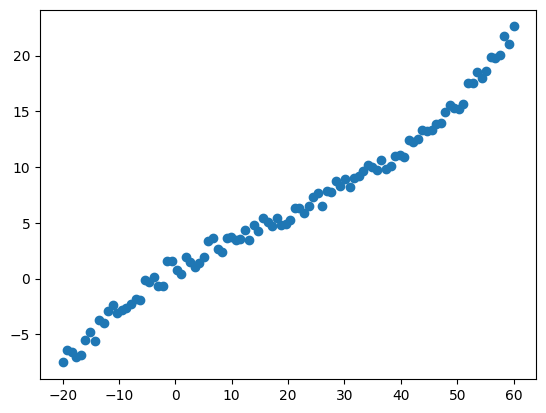

In [61]:
with open('./measurements.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)
    
x = data[:, 0]
y = data[:, 1]

plt.scatter(x,y)
plt.show()

$$f(x) = \theta_0 + \theta_1x$$

$$\text{gdzie } x, \theta_0, \theta_1 \in \mathbb{R}$$

In [62]:
def h_fun(x, theta_0, theta_1):
    '''
    :param x: ndarray o wymiarze ilości przykładów
    :param theta_0: parametr wolny modelu regresji liniowej jednej zmiennej
    :param theta_1: parametr przy xi modelu regresji liniowej jednej zmiennej
    :return: ndarray o wymiarze takim samym jak x, który zawiera wartości f. regresji liniowej dla podanych wag
    '''
    # y = [0 for _ in range(len(x))]
    # 
    # for i in range(len(y)):
    #     y[i] = theta_0 + theta_1 * x[i]
    #     
    # return y
    return theta_0 + theta_1 * x
 

### Funkcja kosztu

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( f(x^{(i)}) - y^{(i)} \right)^2$$

In [63]:
def calculate_cost(x, y, theta_0, theta_1):
    '''
    :param x: ndarray o wymiarze ilości przykładów
    :param y: ndarray z wartościami referencyjnymi o wymiarze takim jak x
    :param theta_0: parametr wolny modelu regresji liniowej jednej zmiennej
    :param theta_1: parametr przy xi modelu regresji liniowej jednej zmiennej
    :return: wartość funkcji kosztu dla podanych paramterów modelu
    '''
    m = len(x)
    predictions = h_fun(x, theta_0, theta_1)
    cost = np.sum([(predictions[i] - y[i]) ** 2 for i in range(m)]) / (2 * m)
    
    return cost

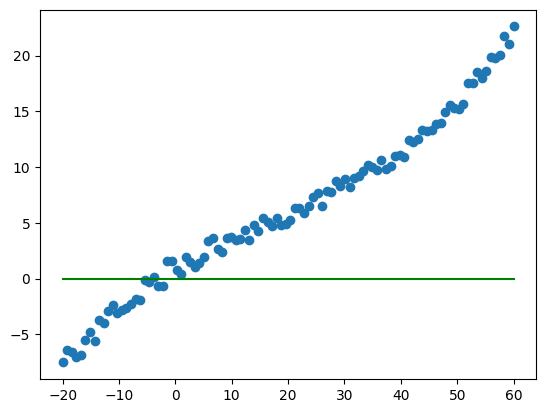

In [64]:
eps = 1e-5  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.001  # learning rate
theta_0 = 0  # - wartości początkowe parametrów modelu
theta_1 = 0

plt.scatter(x,y)
plt.plot(x, h_fun(x,theta_0,theta_1),color="green")
plt.show()


Do minimalizacji skorzystamy z algorytmu gradientu prostego (gradient descent):

$$\theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)$$

Aby wyliczyć gradient będziemy korzystać ze wzorów

$$\begin{align*}
\frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1) &= \frac{1}{m} \sum_{i=1}^{m} \left(h_{\theta}(x^{(i)}) - y^{(i)}\right) \\
\frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1) &= \frac{1}{m} \sum_{i=1}^{m} \left(h_{\theta}(x^{(i)}) - y^{(i)}\right)x^{(i)}
\end{align*}$$

Wstawiamy otrzymane wartości do wzoru na gradient:
$$\begin{align*}
\theta_0 &:= \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^{m} \left(h_{\theta}(x^{(i)}) - y^{(i)}\right) \\
\theta_1 &:= \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^{m} \left(h_{\theta}(x^{(i)}) - y^{(i)}\right)x^{(i)}
\end{align*}$$


In [65]:
def gradient_descent(x,y,theta_0, theta_1,alpha, eps, max_iter=1000):

    m = len(x)
    cost_history = []
    
    for i in range(max_iter):

        predictions = h_fun(x, theta_0, theta_1)

        gradient_theta_0 = (1 / m) * np.sum([predictions[i] - y[i] for i in range(m)])
        gradient_theta_1 = 0

        for j in range(m):
            gradient_theta_1 += (predictions[j] - y[j]) * x[j]
        gradient_theta_1 = gradient_theta_1/m
        
        theta_0 = theta_0 - alpha * gradient_theta_0
        theta_1 = theta_1 - alpha * gradient_theta_1

        cost = calculate_cost(x, y, theta_0, theta_1)
        cost_history.append(cost)


        if i > 0 and abs(cost_history[-2] - cost_history[-1]) < eps:
            break
    
    return theta_0, theta_1, cost_history

In [66]:
eps = 1e-5  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.001  # learning rate
theta_0 = 0  # - wartości początkowe parametrów modelu
theta_1 = 0
theta_0, theta_1, costs = gradient_descent(x,y,theta_0,theta_1,alpha,eps)
print(round(theta_0, 4), round(theta_1, 4), round(costs[-1], 4))

0.0065 0.3154 0.6392


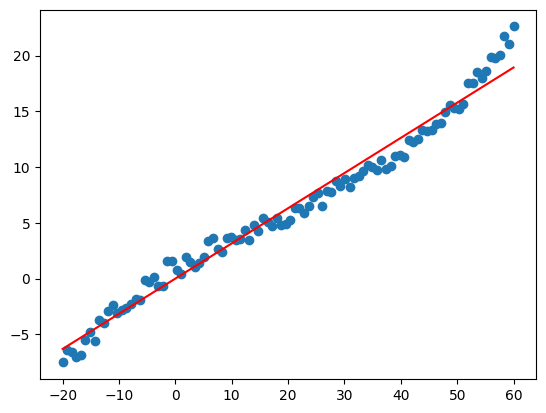

In [67]:
plt.scatter(x,y)
plt.plot(x, h_fun(x,theta_0,theta_1),color="red")
plt.show()

Dla porównania wyników możemy skorzystać z wbudowanej funkcji w bibliotekę sklearn. 

In [107]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

X = np.array(x).reshape(-1, 1)
Y = np.array(y)

regression.fit(X,Y)

print(regression.intercept_)
print(regression.coef_[0])

-0.079087734
0.3172011


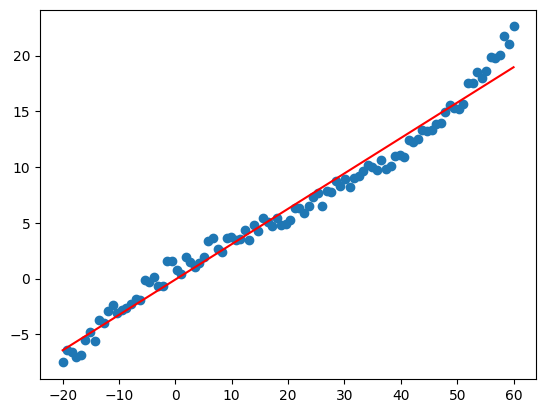

In [114]:
plt.scatter(X,Y)
plt.plot(X, h_fun(x,regression.intercept_, regression.coef_[0]),color="red")
plt.show()

## Many variables linear regression

In [120]:
X = np.vstack([np.ones(x.shape), x])
y.shape = [1, -1]

In [128]:
def h_fun(X, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: 
    '''
    return theta.T @ X
 
def calculate_cost(X, y, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: wartość f. kosztu
    '''
    return ((h_fun(X,theta) - y) ** 2).sum() / (2 * X.shape[1])

def many_variables_gradient(X,y,theta,alpha, eps):
    
    prev_cost = 0
    m = X.shape[1]
    cost = calculate_cost(X,y,theta)
    
    while abs(cost - prev_cost) > eps:
        
        prev_cost = cost
        temp = h_fun(X, theta)
        h_y_diff = (temp - y)
        gradient = h_y_diff @ X.T
        theta = theta - alpha * (gradient.T / m)
        cost = calculate_cost(X, y, theta)

    return theta, cost

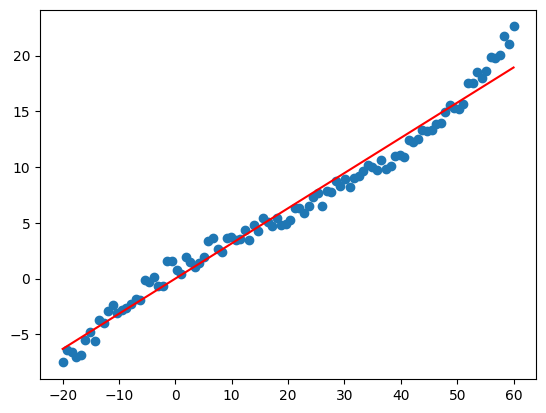

In [129]:
theta = np.array([[0], [0]])
eps = 1e-5
alpha = 0.001
theta, cost = many_variables_gradient(X, y, theta, alpha, eps)
plt.scatter(X[1, :],y)
plt.plot(X[1, :],theta[0,0] + theta[1,0] * X[1, :],color="red")
plt.show()

In [132]:
with open('./housing.txt', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data2 = [row for row in csvreader]
    data2 = np.array(data2, dtype=np.float32)
    y = data2[:, 2]
    y.shape = [1, y.shape[0]]
    X = data2[:, 0:2]
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1).T
    
y_scale = y.max()
y = y / y_scale

X_scale = X.max(axis=1)
X_scale.shape = [-1, 1]
X = X / X_scale

theta = np.array([[0], [0], [0]])
eps = 1e-5
alpha = 0.001
example = np.array([[1], [1300], [4]])

theta, _ = many_variables_gradient(X, y, theta, alpha, eps)
h_example = theta.T @ (example / X_scale) * y_scale

print(f"theta = {theta}")
print(f'koszt nieruchomosi o pow. {example[1][0]} z l. pok. {example[2][0]} oszacowany na {h_example[0][0]}')

theta = [[0.24937951]
 [0.13701888]
 [0.16736231]]
koszt nieruchomosi o pow. 1300 z l. pok. 4 oszacowany na 296090.6397107442


## Polynomial regression

theta = [[ 0.02528658]
 [ 0.77921902]
 [-0.49718083]
 [ 0.65075679]]


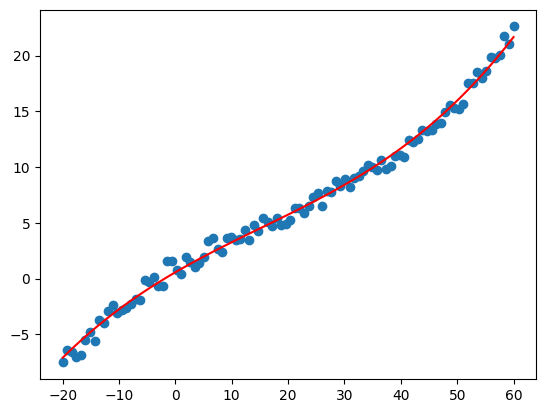

In [137]:
with open('./measurements.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)


x = data[:, 0]
y = data[:, 1]

X = np.vstack([np.ones(x.shape), x, x**2, x**3])

X_scale = X.max(axis=1)
X_scale.shape = [-1, 1]
X = X / X_scale
 
y.shape = [1, -1]
y_scale = y.max()
y = y / y_scale

eps = 1e-10
alpha = 1e-3
theta = np.array([[0], [0], [0], [0]])

theta, _ = many_variables_gradient(X, y, theta, alpha, eps)

print(f"theta = {theta}")

h = np.transpose(theta.T @ X)
plt.scatter(X[1, :] * X_scale[1], y * y_scale)
plt.plot(X[1, :] * X_scale[1], h * y_scale, "r")
plt.show()